In [59]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Collection

In [60]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv


In [61]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')
df_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')

### Data Exploration

In [62]:
df_train.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

`GarageCars` is an `object`, parse it.

In [64]:
df_train["GarageCars"].unique()

array(['two', 'one', 'three', 'zero', nan, 'four'], dtype=object)

In [65]:
df_train["GarageCars"] = df_train["GarageCars"].map({
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
}, na_action="ignore")

Let's check for missing values

In [66]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,1.0,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,1.0,240,0,130,0,0,0,0,0,11,2007.0,119200


~~Not too many of them, let's just drop them.~~ Let's replace them by -1s.

In [67]:
df_train.fillna(-1, inplace=True)


In [68]:
df_train.describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,2.872432,1.043664,6.491438,0.607877,1867.833904,1.754281,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2006.082192,179163.845890
std,0.805929,0.212653,1.632446,0.630833,454.504382,0.743137,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,58.793104,76848.682649
min,0.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


<Figure size 1000x800 with 0 Axes>

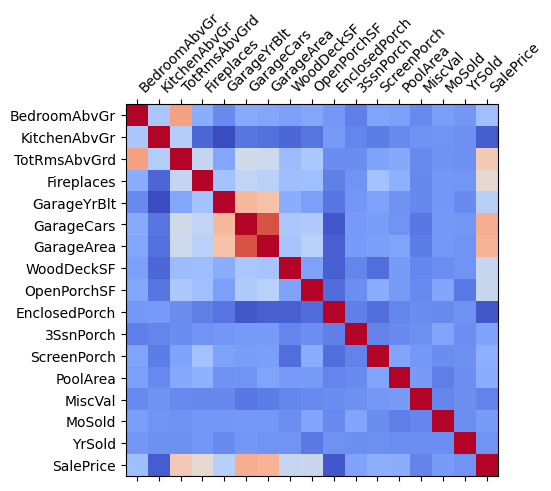

In [69]:
corr_matrix = df_train.corr()
labels = list(corr_matrix.columns)

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(labels)), labels, rotation=45, ha="left")
plt.yticks(range(len(labels)), labels)

plt.show()

### Data Preprocessing

Nothing comes to mind beyond the cleaning already done.

In [70]:
df_test["GarageCars"] = df_test["GarageCars"].map({
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
}, na_action="ignore")

df_test.fillna(-1, inplace=True)

### Model Building and Evaluation

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Am just gonna do a linear model with the two most correlated variables `GarageArea` and `TotRmsAbvGrd`.

In [72]:
X_train, X_eval, y_train, y_eval = train_test_split(df_train[["GarageArea", "TotRmsAbvGrd", "KitchenAbvGr", "EnclosedPorch"]], df_train["SalePrice"], test_size=0.2, random_state=42)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_eval)
loss = mean_absolute_error(y_eval, y_pred)

print(loss)

34989.59462367528


### Generating Submission File

In [74]:
X_test = df_test[["GarageArea", "TotRmsAbvGrd", "KitchenAbvGr", "EnclosedPorch"]]
y_test =  model.predict(X_test)

In [77]:
submission = pd.DataFrame({
    'id': X_test.index,
    'SalePrice': y_test
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()

,id,SalePrice
0,892,268404.872511
1,1105,222830.542467
2,413,167784.987232
3,522,193306.612056
4,1036,181183.789479
